In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
     

data = pd.read_csv("/content/drive/My Drive/IPM.csv")
data

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


In [ ]:
#Cek Info data & Tipe Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [ ]:
#Cek Missing Value
data.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64


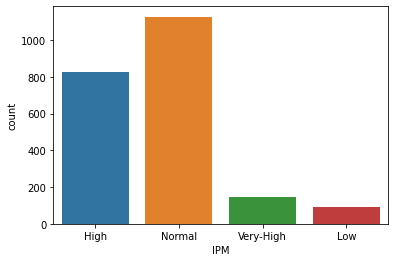

In [ ]:
#VisualisasiData
import seaborn as sns
import matplotlib.pyplot as plt

ver= 'IPM'
hor = sns.countplot(x= ver, data=data)
print(data[ver].value_counts())

In [ ]:
#Variabel Data Frame

DataValues = data.iloc[0:2196, 0:5]
ColumnNames= ['Harapan_Lama_Sekolah','Pengeluaran_Perkapita','Rerata_Lama_Sekolah','Usia_Harapan_Hidup','IPM']

In [ ]:
#Create the Data Frame
LoanData=pd.DataFrame(data=DataValues,columns=ColumnNames)
LoanData.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


In [ ]:
#Menentukan Target Variable dan Predictor Variables
TargetVariable=['IPM']
Predictors=['Harapan_Lama_Sekolah','Pengeluaran_Perkapita','Rerata_Lama_Sekolah','Usia_Harapan_Hidup']
X=LoanData[Predictors].values
y=LoanData[TargetVariable].values

In [ ]:
#Split data untuk training dan testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Xgboost Classification in Python 

import pandas as pd
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=5000, objective='binary:logistic', booster='gbtree')

In [ ]:
#Print semua parameters di XGBoost
print(clf)

XGBClassifier(n_estimators=5000)


In [ ]:
#Buat model pada Training Data
XGB=clf.fit(X_train,y_train.ravel())
prediction=XGB.predict(X_test)

In [ ]:
#Mengukur akurasi Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))


              precision    recall  f1-score   support

        High       0.98      0.96      0.97       174
         Low       1.00      0.95      0.97        20
      Normal       0.97      0.99      0.98       219
   Very-High       0.93      0.93      0.93        27

    accuracy                           0.97       440
   macro avg       0.97      0.96      0.96       440
weighted avg       0.97      0.97      0.97       440

[[167   0   5   2]
 [  0  19   1   0]
 [  2   0 217   0]
 [  2   0   0  25]]


In [ ]:
#Akurasi Model
from sklearn.metrics import accuracy_score

print("Akurasi dari Model:",accuracy_score(y_test,prediction))

Akurasi dari Model: 0.9727272727272728


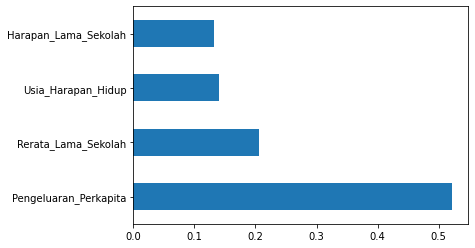

In [ ]:
#Membuat Plot Data Series

%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


In [ ]:
#Print beberapa nilai sample dari prediksi

TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults['TargetColumn']=y_test
TestingDataResults['Prediction']=prediction
TestingDataResults.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,TargetColumn,Prediction
0,12.05,11829.0,6.77,70.60,Normal,Normal
1,13.59,9592.0,9.01,67.45,Normal,Normal
2,12.40,9868.0,7.55,66.27,Normal,Normal
3,13.17,9900.0,8.36,62.51,Normal,Normal
4,12.85,11866.0,8.15,69.90,High,High


Evaluasi pada data tersebut target kolom dan prediksi sama hasilnya atau akurasi tepat.

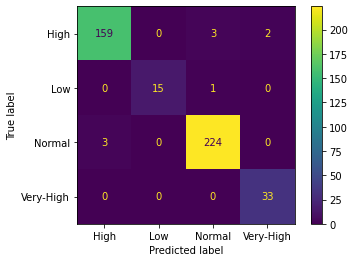

In [ ]:
#Visualisasi data XGBoost


import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["High","Low","Normal","Very-High" ])


cm_display.plot()
plt.show()

=============